In [18]:
#import library
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('whitegrid')

In [19]:
url = "https://www.mohfw.gov.in/"
response = requests.get(url).content
soup = BeautifulSoup(response, 'html.parser')

In [20]:
header = ['SNo', 'Name of State_and_UT','Total_Confirmed_cases','Cured','Death']

In [21]:
all_rows = soup.find_all('tr')

In [22]:
data = pd.DataFrame(columns = header )
for row in all_rows[1:-6]:
    ro=[]
    for i in row.find_all('td'):
        ro.append(i.string)
    #print(ro)
    length = len(data)
    data.loc[length] = ro

In [23]:
data.Total_Confirmed_cases = data.Total_Confirmed_cases.apply(lambda x: int(x))
data.Cured = data.Cured.apply(lambda x: int(x))
data.Death = data.Death.apply(lambda x: x.split('#')[0]) # "#" present in a value 
data.Death = data.Death.apply(lambda x: int(x))

In [24]:
data['Acitve_Cases']=data.Total_Confirmed_cases-data.Cured-data.Death

In [25]:
data.head()

,SNo,Name of State_and_UT,Total_Confirmed_cases,Cured,Death,Acitve_Cases
0,1,Andaman and Nicobar Islands,33,33,0,0
1,2,Andhra Pradesh,2602,1640,53,909
2,3,Arunachal Pradesh,1,1,0,0
3,4,Assam,170,48,4,118
4,5,Bihar,1674,571,10,1093


In [26]:
sorted_data=data.sort_values(by='Total_Confirmed_cases',ascending=False)
sorted_data.reset_index(drop=True, inplace=True)

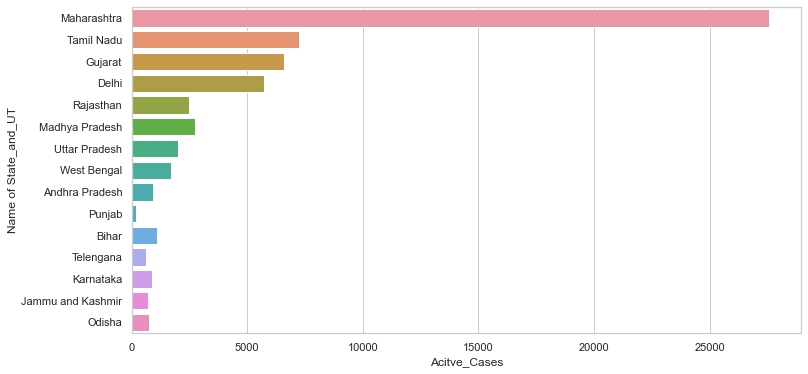

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(x='Acitve_Cases',y='Name of State_and_UT', data= sorted_data[:15])

In [28]:
sorted_data

,SNo,Name of State_and_UT,Total_Confirmed_cases,Cured,Death,Acitve_Cases
0,20,Maharashtra,39297,10318,1390,27589
1,28,Tamil Nadu,13191,5882,87,7222
2,11,Gujarat,12537,5219,749,6569
3,9,Delhi,11088,5192,176,5720
4,27,Rajasthan,6015,3404,147,2464
5,19,Madhya Pradesh,5735,2733,267,2735
6,32,Uttar Pradesh,5175,3066,127,1982
7,33,West Bengal,3103,1136,253,1714
8,2,Andhra Pradesh,2602,1640,53,909
9,26,Punjab,2005,1794,38,173


In [29]:
data.to_csv('19_May_2020.csv', index=False)

In [30]:
sorted_data[:7]

,SNo,Name of State_and_UT,Total_Confirmed_cases,Cured,Death,Acitve_Cases
0,20,Maharashtra,39297,10318,1390,27589
1,28,Tamil Nadu,13191,5882,87,7222
2,11,Gujarat,12537,5219,749,6569
3,9,Delhi,11088,5192,176,5720
4,27,Rajasthan,6015,3404,147,2464
5,19,Madhya Pradesh,5735,2733,267,2735
6,32,Uttar Pradesh,5175,3066,127,1982


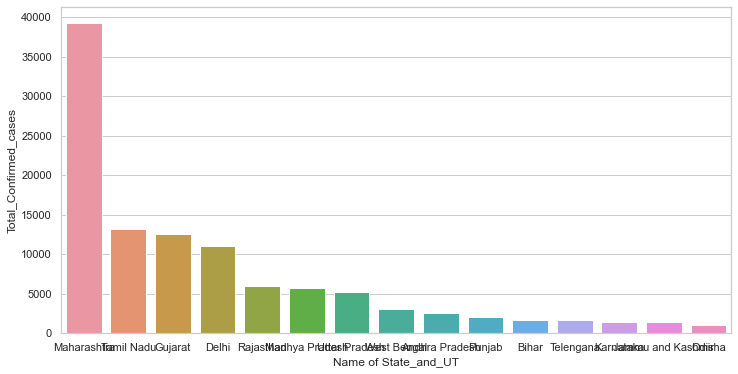

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x='Name of State_and_UT',y='Total_Confirmed_cases', data= sorted_data[:15])